In [1]:
using Plots
using LinearAlgebra
using SparseArrays
using Random
Random.seed!(1234);  # determinism
plot([1], [1]);      # pre-compile

In [2]:
# Read data
I, J = Vector{Int64}(), Vector{Int64}()
open("Florida-bay.txt") do f
    for line in eachline(f)
        i, j = [parse(Int64, v) for v in split(line)]
        if i != j
            push!(I, i + 1); push!(J, j + 1);  # 1-index
        end
    end
end
n = max(maximum(I), maximum(J))  # number of nodes
m = length(I);                   # number of edges

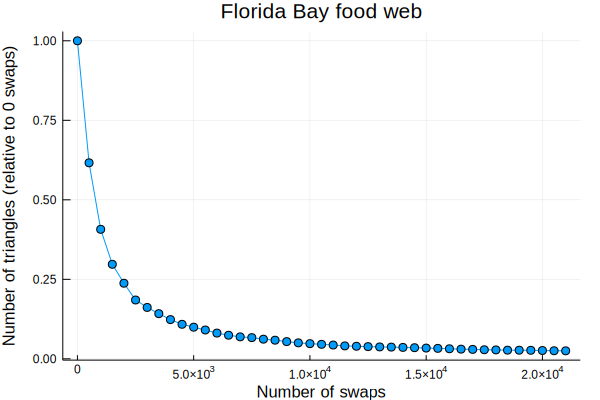

In [3]:
function number_of_triangles()
    A = sparse(I, J, 1, n, n)
    A = min.(max.(A, A'), 1)
    return sum(diag(A^3))
end

num_triangles = [number_of_triangles()]
trials = [0]

for trial = 1:(10 * m)
    s = rand(1:m, 2)
    u, w = I[s]
    v, x = J[s]
    if length(unique([u, v, w, x])) == 4
        J[s[1]] = x; J[s[2]] = w
    end
    if trial % 500 == 0
        push!(trials, trial)
        push!(num_triangles, number_of_triangles())
    end
end

plot(trials, num_triangles ./ num_triangles[1], label="", marker=:circle,
     xlabel="Number of swaps", ylabel="Number of triangles (relative to 0 swaps)",
     title="Florida Bay food web")

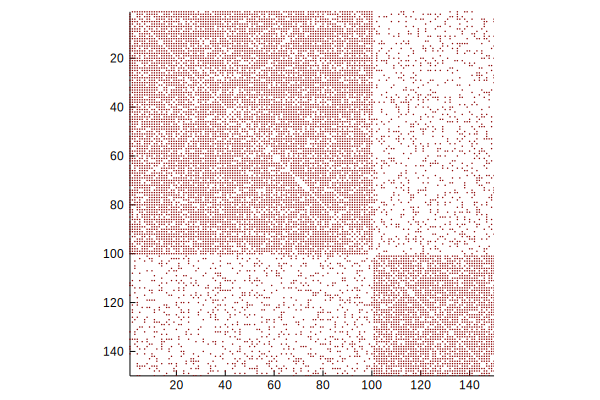

In [4]:
# Generate SBM
n1 = 100; n2 = 50
p = 0.8;  q = 0.2
A = zeros(n1 + n2, n1 + n2)
for i = 1:n1, j = (i+1):n1  # block 1
    if rand() <= p; A[i, j] = 1; end
end
for i = 1:n2, j = (i+1):n2 # block 2
    if rand() <= p; A[i + n1, j + n1] = 1; end
end
for i = 1:n1, j = 1:n2
    if rand() <= q; A[i, j + n1] = 1; end
end
A = max.(A, A')
spy(sparse(A), legend=nothing, m=:heat)

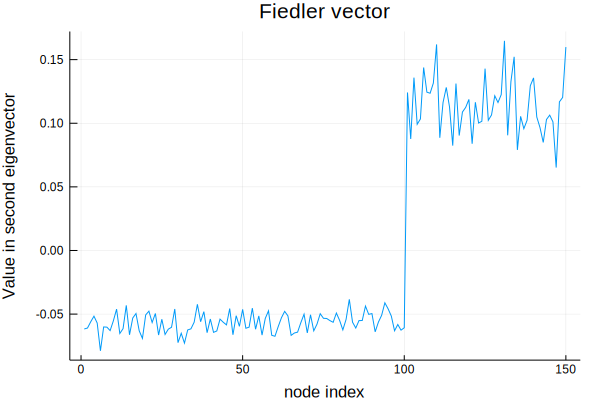

In [5]:
d = vec(sum(A, dims=1))
L = Diagonal(d) - A
v2 = eigen(L).vectors[:, 2]
plot(v2, label="", xlabel="node index",
     ylabel="Value in second eigenvector",
     title="Fiedler vector")